In [1]:
import pandas as pd

In [2]:
df=pd.read_excel("Linear Regression.xlsx",sheet_name=0)


In [3]:
df

,price,sqft_living,bedrooms,bathrooms,floors
0,221900,1180,3,1.00,1.0
1,538000,2570,3,2.25,2.0
2,180000,770,2,1.00,1.0
3,604000,1960,4,3.00,1.0
4,510000,1680,3,2.00,1.0
...,...,...,...,...,...
21608,360000,1530,3,2.50,3.0
21609,400000,2310,4,2.50,2.0
21610,402101,1020,2,0.75,2.0
21611,400000,1600,3,2.50,2.0


In [4]:
df.shape

(21613, 5)

In [5]:
#so there are Rows 21613 and 5 Columns

In [6]:
df.dtypes

price            int64
sqft_living      int64
bedrooms         int64
bathrooms      float64
floors         float64
dtype: object

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,21613.0,540088.141905,367127.195968,75000.0,321950.00,450000.00,645000.0,7700000.0
sqft_living,21613.0,2079.899736,918.440897,290.0,1427.00,1910.00,2550.0,13540.0
bedrooms,21613.0,3.370842,0.930062,0.0,3.00,3.00,4.0,33.0
bathrooms,21613.0,2.114757,0.770163,0.0,1.75,2.25,2.5,8.0
floors,21613.0,1.494309,0.539989,1.0,1.00,1.50,2.0,3.5


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        21613 non-null  int64  
 1   sqft_living  21613 non-null  int64  
 2   bedrooms     21613 non-null  int64  
 3   bathrooms    21613 non-null  float64
 4   floors       21613 non-null  float64
dtypes: float64(2), int64(3)
memory usage: 844.4 KB


In [9]:
df.isna()

,price,sqft_living,bedrooms,bathrooms,floors
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
21608,False,False,False,False,False
21609,False,False,False,False,False
21610,False,False,False,False,False
21611,False,False,False,False,False


So there is no null values in the dataset

# Exploratory Data Analysis

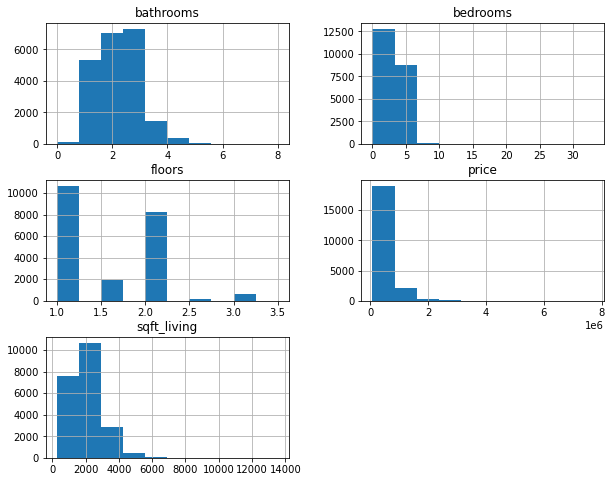

In [10]:
import matplotlib.pyplot as plt
df.hist(figsize=(10,8))
plt.show()

In [11]:
df.corr()

,price,sqft_living,bedrooms,bathrooms,floors
price,1.000000,0.702035,0.308350,0.525138,0.256794
sqft_living,0.702035,1.000000,0.576671,0.754665,0.353949
bedrooms,0.308350,0.576671,1.000000,0.515884,0.175429
bathrooms,0.525138,0.754665,0.515884,1.000000,0.500653
floors,0.256794,0.353949,0.175429,0.500653,1.000000


#so all the variables are positively correlated with each other 
#And out of all the variables price vs sqft_living, bathrooms vs sqft_living shows highest correlation.

In [12]:
import seaborn as sns

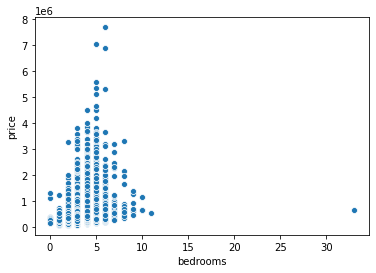

In [13]:
sns.scatterplot(df["bedrooms"],df["price"])

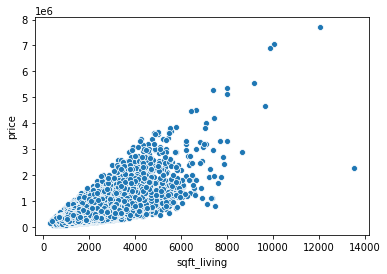

In [14]:
sns.scatterplot(df["sqft_living"],df["price"])

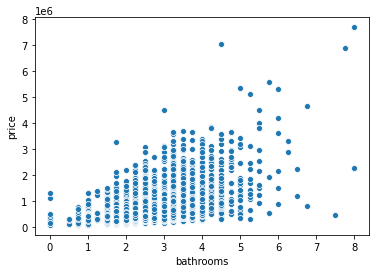

In [15]:
sns.scatterplot(df["bathrooms"],df["price"])

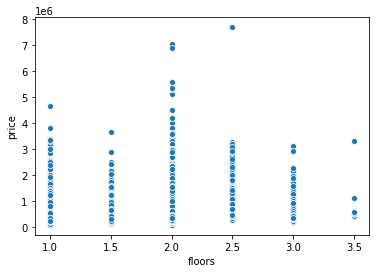

In [16]:
sns.scatterplot(df["floors"],df["price"])

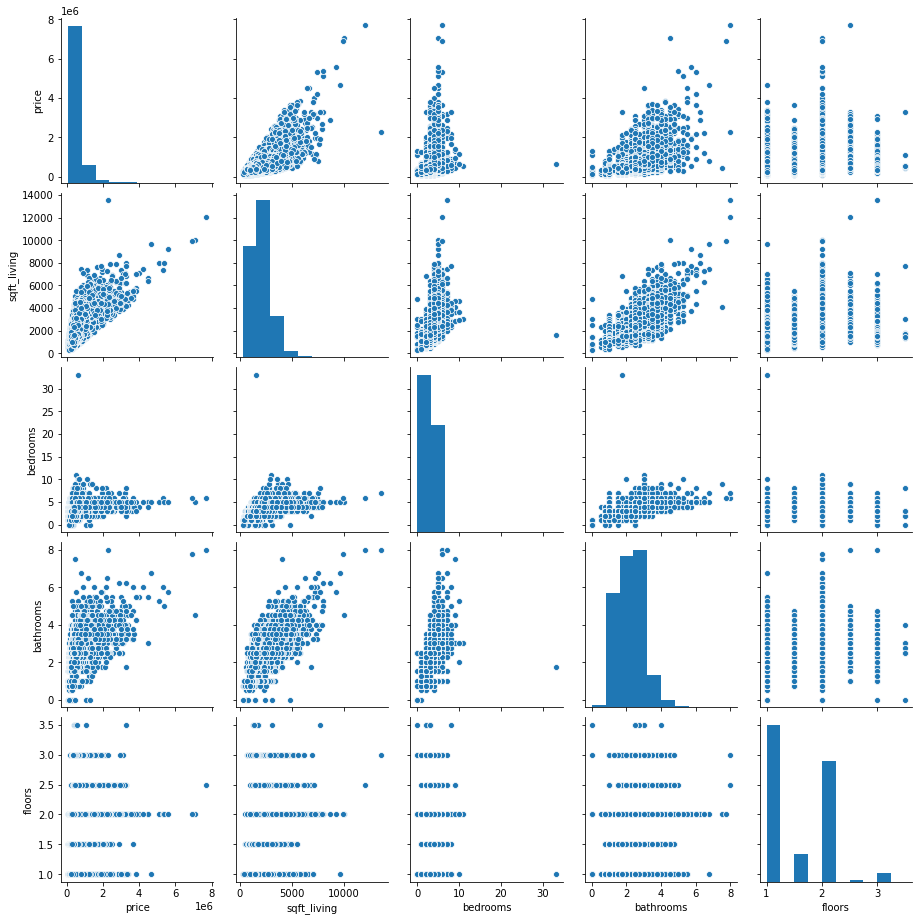

In [17]:
sns.pairplot(df)
plt.show()

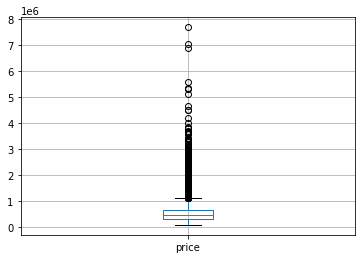

In [18]:
df.boxplot(["price"])

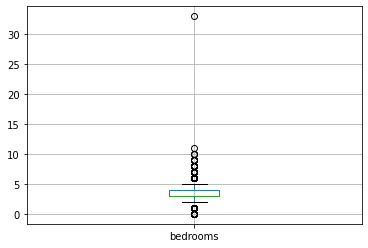

In [19]:
df.boxplot(["bedrooms"])

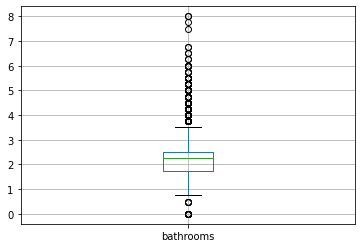

In [20]:
df.boxplot(["bathrooms"])

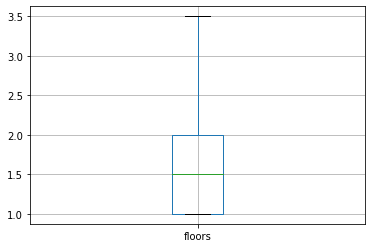

In [21]:
df.boxplot(["floors"])

In [22]:
#so the above boxplot shows the outliers in the dataset which is highest in price columns 

In [23]:
df.columns

Index(['price', 'sqft_living', 'bedrooms', 'bathrooms', 'floors'], dtype='object')

# Linear Regression for square feet living

split the dataset into x and y

In [24]:
x=df[["sqft_living"]] 
x.head(2)

,sqft_living
0,1180
1,2570


In [25]:
y=df[["price"]]
y.head(2)

,price
0,221900
1,538000


Text(0, 0.5, 'Price')

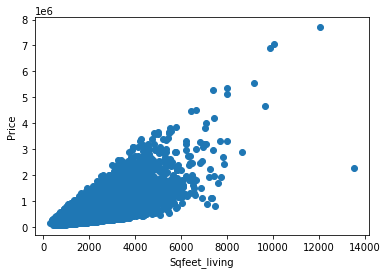

In [26]:
import matplotlib.pyplot as plt
plt.scatter(x,y)
plt.xlabel("Sqfeet_living")
plt.ylabel("Price")

spliting the dataset for training and testing

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.2,random_state=2)

In [29]:
df.shape

(21613, 5)

In [30]:
print(x_train.shape)

(17290, 1)


In [31]:
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(17290, 1)
(4323, 1)
(4323, 1)


Model Building with sklearn

In [32]:
from sklearn.linear_model import LinearRegression

In [33]:
reg=LinearRegression()

In [34]:
reg.fit(x_train,y_train)

LinearRegression()

In [35]:
reg.coef_

array([[280.67382569]])

In [36]:
reg.intercept_

array([-42568.70358496])

Visualising the training set result

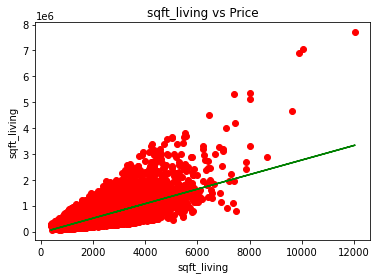

In [37]:
plt.scatter(x_train,y_train,color='red')
plt.plot(x_train,reg.predict(x_train),color='green')
plt.title("sqft_living vs Price")
plt.xlabel('sqft_living')
plt.ylabel('sqft_living')
plt.show()

In [38]:
df.columns

Index(['price', 'sqft_living', 'bedrooms', 'bathrooms', 'floors'], dtype='object')

Test 

In [39]:
pred=reg.predict(x_test)
pred

array([[633855.21632509],
       [566493.49815977],
       [364408.34366382],
       ...,
       [701216.9344904 ],
       [187583.83347987],
       [465450.9209118 ]])

In [40]:
y

,price
0,221900
1,538000
2,180000
3,604000
4,510000
...,...
21608,360000
21609,400000
21610,402101
21611,400000


In [41]:
from sklearn.metrics import mean_squared_error, r2_score

In [42]:
import numpy as np
rmse=np.sqrt(mean_squared_error(y_test,pred))

In [43]:
rmse #root mean square error 

263380.00189817196

In [44]:
r_square=r2_score(y_test,pred)

In [45]:
r_square

0.5031163723285275

In [46]:
df["sqft_living"].unique()

array([1180, 2570,  770, ..., 3087, 3118, 1425], dtype=int64)

In [47]:
new=reg.predict(np.array([[1180]]))

In [48]:
new

array([[288626.41072784]])

# Linear Regression for bedrooms

In [49]:
x1=df[["bedrooms"]]
print(x1.head(2))
y1=df[["price"]]
print(y1.head(2))

   bedrooms
0         3
1         3
    price
0  221900
1  538000


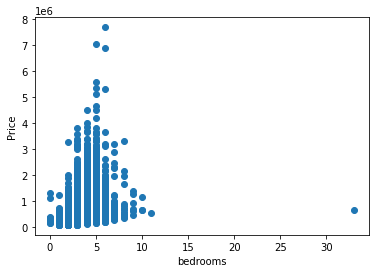

In [50]:
import matplotlib.pyplot as plt
plt.scatter(x1,y1)
plt.xlabel("bedrooms")
plt.ylabel("Price")
from sklearn.model_selection import train_test_split

In [51]:
x1_train,x1_test,y1_train,y1_test=train_test_split(x1,y1, test_size=0.2,random_state=2)
print(df.shape)
print(x1_train.shape)
print(y1_train.shape)
print(x1_test.shape)
print(y1_test.shape)

(21613, 5)
(17290, 1)
(17290, 1)
(4323, 1)
(4323, 1)


[[118660.62797869]]
[139952.87593386]


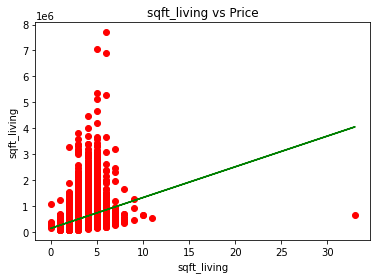

In [52]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(x1_train,y1_train)
print(reg.coef_)
print(reg.intercept_)
plt.scatter(x1_train,y1_train,color='red')
plt.plot(x1_train,reg.predict(x1_train),color='green')
plt.title("sqft_living vs Price")
plt.xlabel('sqft_living')
plt.ylabel('sqft_living')
plt.show()

In [53]:
x1

,bedrooms
0,3
1,3
2,2
3,4
4,3
...,...
21608,3
21609,4
21610,2
21611,3


In [54]:
pred=reg.predict(x1_test)
pred

array([[614595.3878486 ],
       [495934.75986992],
       [377274.13189123],
       ...,
       [614595.3878486 ],
       [377274.13189123],
       [614595.3878486 ]])

In [55]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
rmse=np.sqrt(mean_squared_error(y1_test,pred))
print(rmse)
r_square=r2_score(y1_test,pred)
print(r_square)

352717.96541876445
0.10886345250291596


In [56]:
new=reg.predict(np.array([[4]]))
new

array([[614595.3878486]])

In [57]:
df.head(5)

,price,sqft_living,bedrooms,bathrooms,floors
0,221900,1180,3,1.00,1.0
1,538000,2570,3,2.25,2.0
2,180000,770,2,1.00,1.0
3,604000,1960,4,3.00,1.0
4,510000,1680,3,2.00,1.0


# Linear Regression for bathrooms

In [58]:
x1=df[["bathrooms"]]
print(x1.head(2))
y1=df[["price"]]
print(y1.head(2))

   bathrooms
0       1.00
1       2.25
    price
0  221900
1  538000


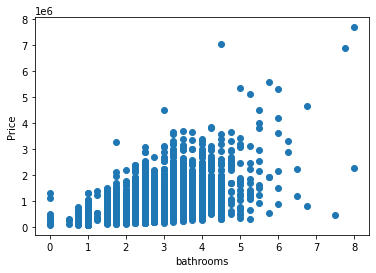

In [59]:
import matplotlib.pyplot as plt
plt.scatter(x1,y1)
plt.xlabel("bathrooms")
plt.ylabel("Price")
from sklearn.model_selection import train_test_split

(21613, 5)
(17290, 1)
(17290, 1)
(4323, 1)
(4323, 1)
[[249143.95803858]]
[13073.9957529]


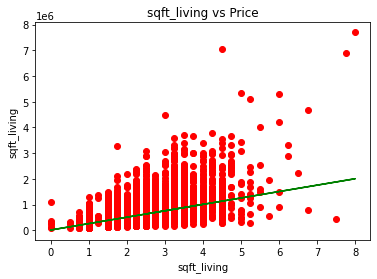

In [60]:
x1_train,x1_test,y1_train,y1_test=train_test_split(x1,y1, test_size=0.2,random_state=2)
print(df.shape)
print(x1_train.shape)
print(y1_train.shape)
print(x1_test.shape)
print(y1_test.shape)
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(x1_train,y1_train)
print(reg.coef_)
print(reg.intercept_)
plt.scatter(x1_train,y1_train,color='red')
plt.plot(x1_train,reg.predict(x1_train),color='green')
plt.title("sqft_living vs Price")
plt.xlabel('sqft_living')
plt.ylabel('sqft_living')
plt.show()

In [61]:
pred=reg.predict(x1_test)
pred

array([[573647.90133969],
       [386789.93281076],
       [262217.95379147],
       ...,
       [635933.89084934],
       [262217.95379147],
       [698219.88035898]])

In [62]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
rmse=np.sqrt(mean_squared_error(y1_test,pred))
print(rmse)
r_square=r2_score(y1_test,pred)
print(r_square)

316774.90190998075
0.28122887124177365


In [63]:
new=reg.predict(np.array([[2.25]]))
new

array([[573647.90133969]])

In [64]:
df

,price,sqft_living,bedrooms,bathrooms,floors
0,221900,1180,3,1.00,1.0
1,538000,2570,3,2.25,2.0
2,180000,770,2,1.00,1.0
3,604000,1960,4,3.00,1.0
4,510000,1680,3,2.00,1.0
...,...,...,...,...,...
21608,360000,1530,3,2.50,3.0
21609,400000,2310,4,2.50,2.0
21610,402101,1020,2,0.75,2.0
21611,400000,1600,3,2.50,2.0


# Linear Regression for floors

In [65]:
x1=df[["floors"]]
print(x1.head(2))
y1=df[["price"]]
print(y1.head(2))

   floors
0     1.0
1     2.0
    price
0  221900
1  538000


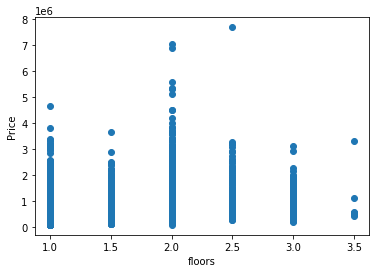

In [66]:
import matplotlib.pyplot as plt
plt.scatter(x1,y1)
plt.xlabel("floors")
plt.ylabel("Price")
from sklearn.model_selection import train_test_split

(21613, 5)
(17290, 1)
(17290, 1)
(4323, 1)
(4323, 1)
[[171376.44562902]]
[283309.93245028]


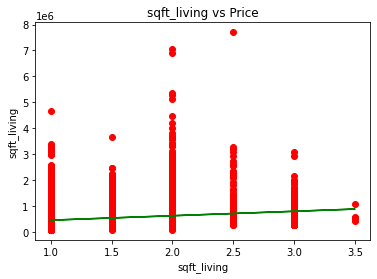

In [67]:
x1_train,x1_test,y1_train,y1_test=train_test_split(x1,y1, test_size=0.2,random_state=2)
print(df.shape)
print(x1_train.shape)
print(y1_train.shape)
print(x1_test.shape)
print(y1_test.shape)
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(x1_train,y1_train)
print(reg.coef_)
print(reg.intercept_)
plt.scatter(x1_train,y1_train,color='red')
plt.plot(x1_train,reg.predict(x1_train),color='green')
plt.title("sqft_living vs Price")
plt.xlabel('sqft_living')
plt.ylabel('sqft_living')
plt.show()

In [68]:
pred=reg.predict(x1_test)
pred

array([[540374.60089382],
       [454686.37807931],
       [454686.37807931],
       ...,
       [626062.82370833],
       [454686.37807931],
       [540374.60089382]])

In [69]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
rmse=np.sqrt(mean_squared_error(y1_test,pred))
print(rmse)
r_square=r2_score(y1_test,pred)
print(r_square)

359677.77234107786
0.0733487976687478


In [70]:
new=reg.predict(np.array([[2]]))
new

array([[626062.82370833]])

In [71]:
df

,price,sqft_living,bedrooms,bathrooms,floors
0,221900,1180,3,1.00,1.0
1,538000,2570,3,2.25,2.0
2,180000,770,2,1.00,1.0
3,604000,1960,4,3.00,1.0
4,510000,1680,3,2.00,1.0
...,...,...,...,...,...
21608,360000,1530,3,2.50,3.0
21609,400000,2310,4,2.50,2.0
21610,402101,1020,2,0.75,2.0
21611,400000,1600,3,2.50,2.0


# Multiple Regression using sqft_living, bedrooms, bathrooms and floors

In [72]:
x1=df[['sqft_living', 'bedrooms', 'bathrooms','floors']]
print(x1.head(2))
y1=df[["price"]]
print(y1.head(2))

   sqft_living  bedrooms  bathrooms  floors
0         1180         3       1.00     1.0
1         2570         3       2.25     2.0
    price
0  221900
1  538000


In [73]:
df.columns

Index(['price', 'sqft_living', 'bedrooms', 'bathrooms', 'floors'], dtype='object')

In [74]:
from sklearn.model_selection import train_test_split

In [75]:
x1_train,x1_test,y1_train,y1_test=train_test_split(x1,y1, test_size=0.2,random_state=2)
print(df.shape)
print(x1_train.shape)
print(y1_train.shape)
print(x1_test.shape)
print(y1_test.shape)
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(x1_train,y1_train)
print(reg.coef_)
print(reg.intercept_)

(21613, 5)
(17290, 4)
(17290, 1)
(4323, 4)
(4323, 1)
[[   309.11099034 -57550.54119311   8440.49060067  -1165.39355228]]
[76097.6329834]


In [76]:
pred=reg.predict(x1_test)
pred

array([[608095.96846158],
       [585712.20079791],
       [416482.58364346],
       ...,
       [683810.03201801],
       [221742.65972713],
       [426849.61955589]])

In [77]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
rmse=np.sqrt(mean_squared_error(y1_test,pred))
print(rmse)
r_square=r2_score(y1_test,pred)
print(r_square)

259763.19584802483
0.5166693554435362


In [78]:
new=reg.predict(np.array([[2570,3,2.25,2]])) 
print("Predicted value for 2570 square feet, 3 bedrooms, 2.25 bathrooms and 2 floors is:") 
new

Predicted value for 2570 square feet, 3 bedrooms, 2.25 bathrooms and 2 floors is:


array([[714521.57133349]])

In [79]:
df.head(2)

,price,sqft_living,bedrooms,bathrooms,floors
0,221900,1180,3,1.00,1.0
1,538000,2570,3,2.25,2.0
